## Group 6 Mini-Project: Popular Spotify Songs

In [13]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### 1: Import Data

In [14]:
data = pd.read_csv('Popular_Spotify_Songs.csv', encoding='latin1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [15]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


### 2: Clean Data

In [16]:
# Remove non-numeric values for streams
data['streams'] = pd.to_numeric(data['streams'], errors="coerce", downcast='integer')
data.dropna(subset=['streams'], inplace=True)

# Sort in ascending order based on 'streams'
cleaned_data = data.sort_values('streams')
cleaned_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2,2022,12,9,763,26,2.762000e+03,21,...,162,A#,Major,49,78,64,19,0,11,4
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1.365184e+06,13,...,105,G,Major,82,62,74,10,0,33,7
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,1.159939e+07,17,...,97,NaN,Major,79,92,89,5,0,6,5
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,1.195664e+07,5,...,133,B,Minor,93,68,65,42,0,12,25
68,Overdrive,Post Malone,1,2023,7,14,410,36,1.478042e+07,36,...,140,C#,Major,56,48,73,0,0,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8


In [17]:
# Change categorical 'mode' to numerical
cleaned_data['mode'].replace(['Major', 'Minor'], [1, 2], inplace=True)
cleaned_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2,2022,12,9,763,26,2.762000e+03,21,...,162,A#,1,49,78,64,19,0,11,4
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1.365184e+06,13,...,105,G,1,82,62,74,10,0,33,7
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,1.159939e+07,17,...,97,NaN,1,79,92,89,5,0,6,5
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,1.195664e+07,5,...,133,B,2,93,68,65,42,0,12,25
68,Overdrive,Post Malone,1,2023,7,14,410,36,1.478042e+07,36,...,140,C#,1,56,48,73,0,0,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,1,76,91,50,54,0,7,5
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,2,82,54,59,69,0,18,10
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,1,50,45,41,75,0,11,3
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,2,83,93,65,58,0,9,8


In [18]:
# Remove irrelevant columns
irrelevant_col = ['artist_count', 'released_day', 'in_apple_playlists', 'in_apple_charts', 
                  'in_deezer_charts', 'in_deezer_playlists', 'in_shazam_charts', 'bpm', 'key']  
cleaned_data.drop(columns=irrelevant_col, inplace=True)
cleaned_data

,track_name,artist(s)_name,released_year,released_month,in_spotify_playlists,in_spotify_charts,streams,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2022,12,763,26,2.762000e+03,1,49,78,64,19,0,11,4
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",2022,12,138,4,1.365184e+06,1,82,62,74,10,0,33,7
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",2023,7,437,31,1.159939e+07,1,79,92,89,5,0,6,5
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2023,6,293,8,1.195664e+07,2,93,68,65,42,0,12,25
68,Overdrive,Post Malone,2023,7,410,36,1.478042e+07,1,56,48,73,0,0,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2018,10,24094,78,2.808097e+09,1,76,91,50,54,0,7,5
620,Dance Monkey,Tones and I,2019,5,24529,0,2.864792e+09,2,82,54,59,69,0,18,10
86,Someone You Loved,Lewis Capaldi,2018,11,17836,53,2.887242e+09,1,50,45,41,75,0,11,3
179,Shape of You,Ed Sheeran,2017,1,32181,10,3.562544e+09,2,83,93,65,58,0,9,8


In [19]:
# Check for null values
for i in cleaned_data:
    nulls = cleaned_data[i].isnull().sum()
    print(f"Nulls for {i}: {nulls}")

Nulls for track_name: 0
Nulls for artist(s)_name: 0
Nulls for released_year: 0
Nulls for released_month: 0
Nulls for in_spotify_playlists: 0
Nulls for in_spotify_charts: 0
Nulls for streams: 0
Nulls for mode: 0
Nulls for danceability_%: 0
Nulls for valence_%: 0
Nulls for energy_%: 0
Nulls for acousticness_%: 0
Nulls for instrumentalness_%: 0
Nulls for liveness_%: 0
Nulls for speechiness_%: 0


#### <ins> Features:</ins>

**track_name:** *name of the song* 

**artist(s)\_name:** *name of the artist* 

**released_year:** *year the song is released* --> numerical 

**released_month:** *month the song is released* --> categorical

      MONTHS OF A YEAR: 
      1    JAN
      2    FEB
      3    MAR
      ...

**in_spotify_playlists:** *number of spotify playlists the songs are in* --> numerical 

**in_spotify_charts:** *number of spotify charts the songs are in* --> numerical 

**streams:** *number of times the songs are played* --> numerical 

**mode:** *type of musical scale* --> categorical

      1    MAJOR
      2    MINOR

**danceability_%:** *how suitable a track is for dancing* --> percentage 

**valence_%:** *describes the musical positiveness conveyed by a track* --> percentage 

**energy_%:** *perceptual measure of intensity and activity* --> percentage 

**acousticness_%:** *whether the track is acoustic* --> percentage 

**instrumentalness_%:** *percentage of the song that doesn't contain vocals* --> percentage

**liveness_%:** *detects the presence of an audience in the recording* --> percentage

**speechiness_%:** *measures the presence of spoken words* --> percentage

### 3: Exploratory Data Analysis

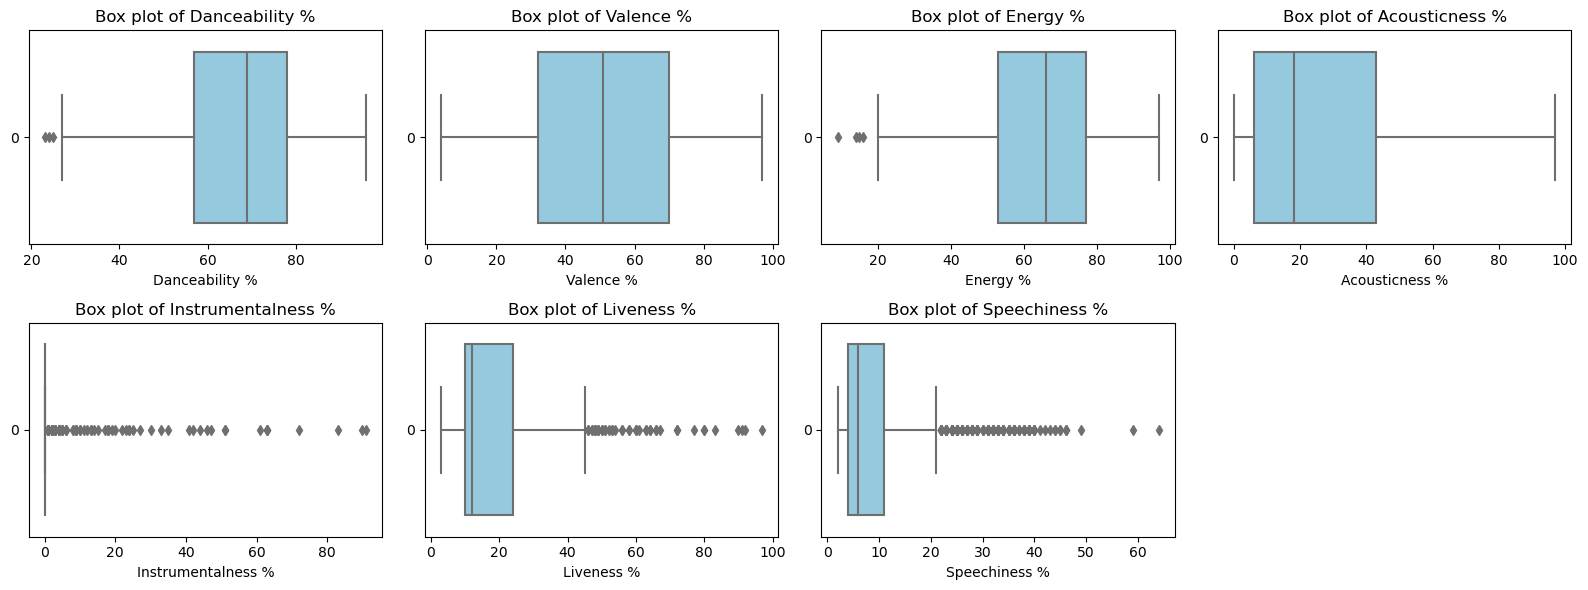

In [20]:
# Create boxplots for each column
plt.figure(figsize=(16, 6))
cols = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
percentage_features = cleaned_data[cols]

# Loop through each column and create a boxplot
for i, column in enumerate(percentage_features.columns):
    plt.subplot(2, 4, i+1)
    sb.boxplot(data=percentage_features[column], orient="h", color='skyblue')
    plt.xlabel(column.replace('_', ' ').capitalize())
    plt.title(f'Box plot of {column.replace("_", " ").capitalize()}')

plt.tight_layout()  
plt.show()

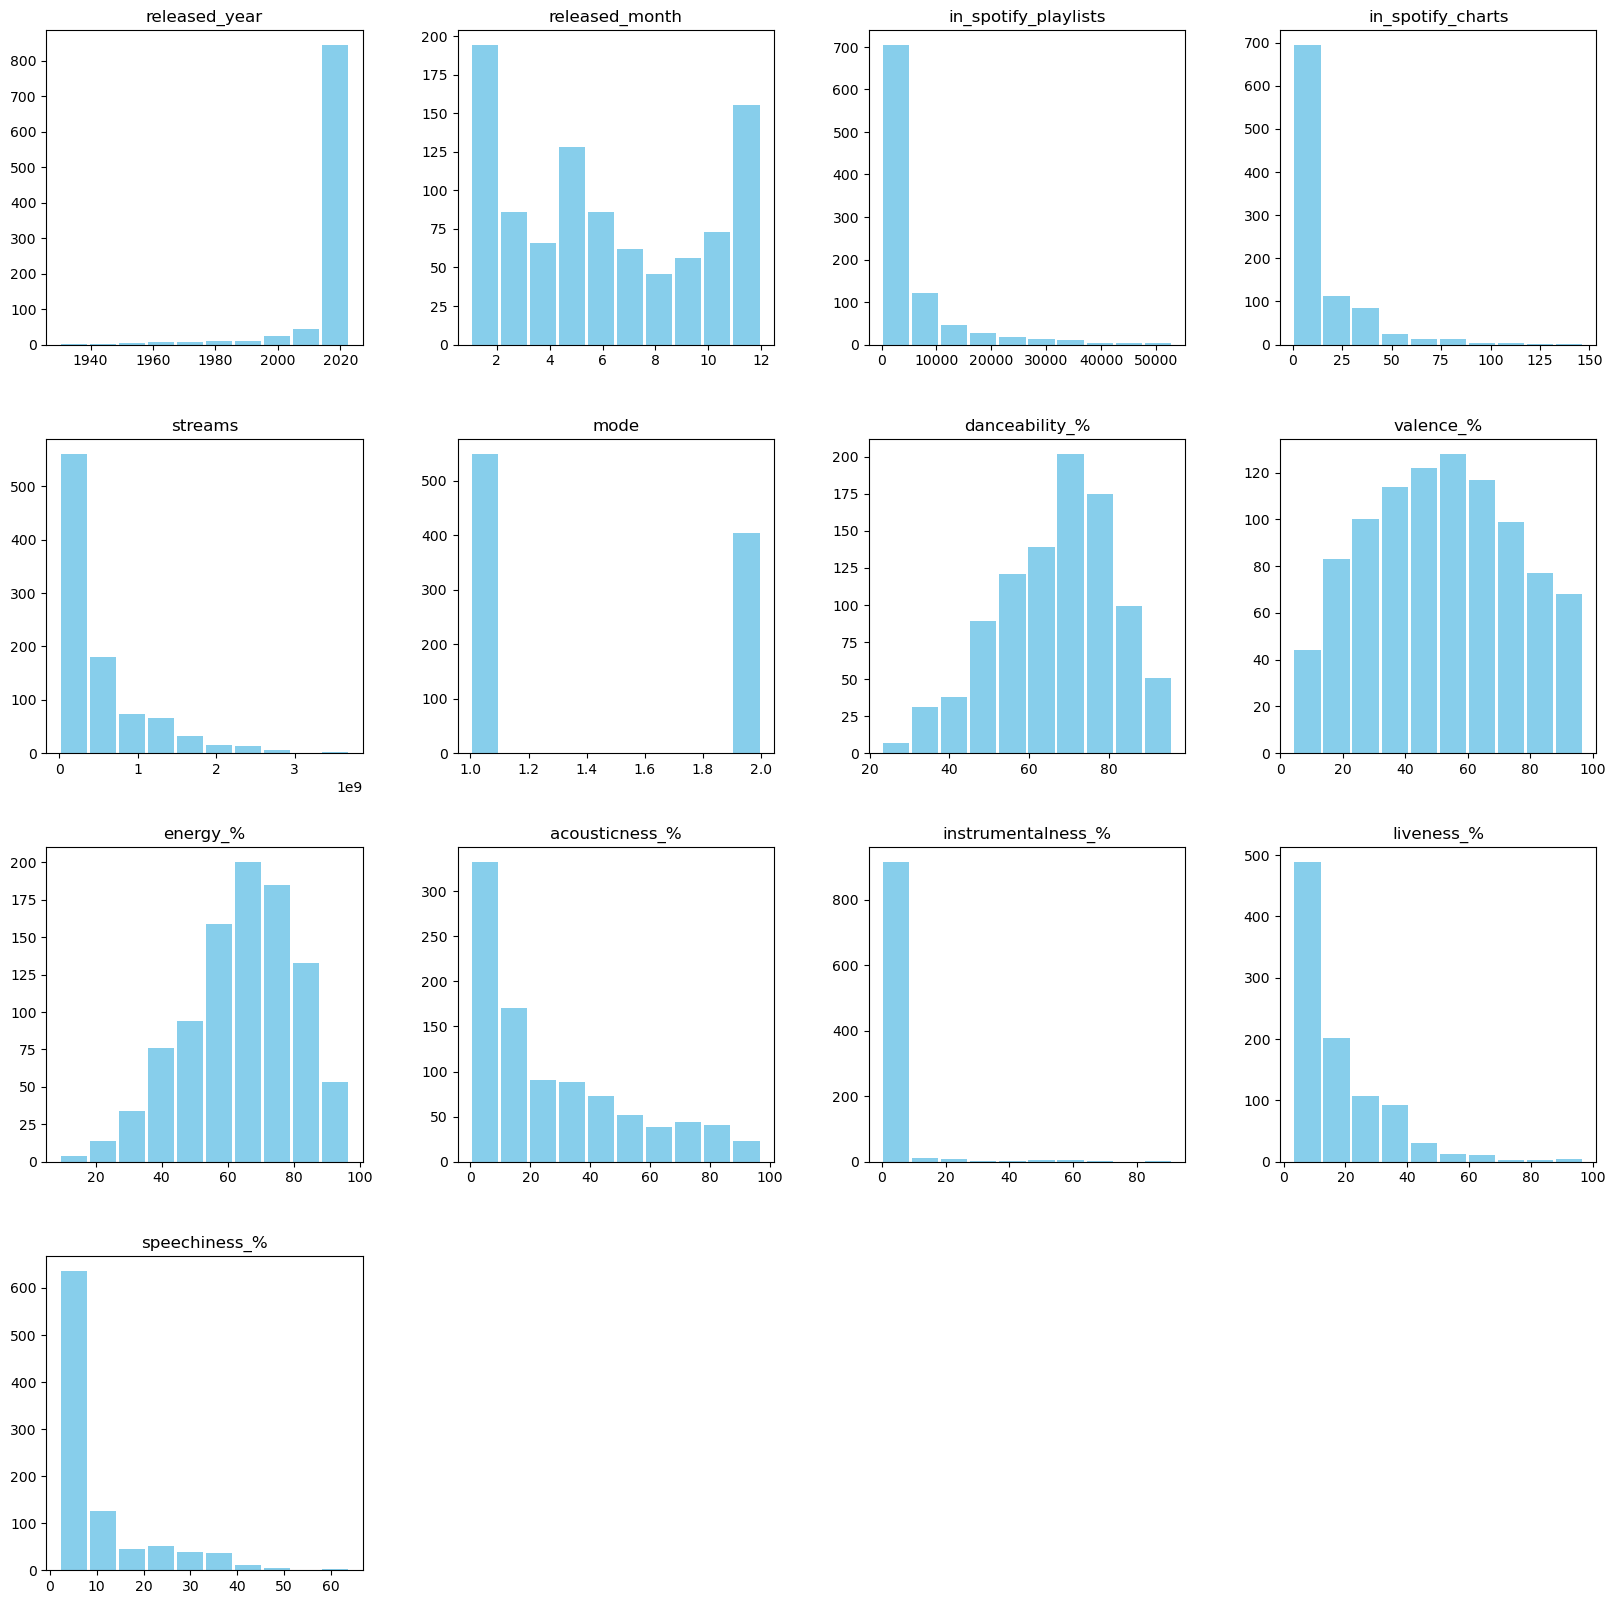

In [21]:
cleaned_data.hist(column=cleaned_data.columns,
              color = 'skyblue',
              figsize = (20,20), # (x axis and y axis in inches)
              bins = 10, # number of bins to divide the data into
              rwidth = 0.9, # width between each bin
              grid = False # to remove the grid for cleaner visualization
       )
plt.show()

In [22]:
# not sure if v useful lol
plt.figure(figsize=(15,15))
for i,col in enumerate(nfeatures,1):
    plt.subplot(5,4,i)
    plt.title(f"Distribution of {col}")
    sb.violinplot(data=cleaned_data, y=cleaned_data[col])
    plt.tight_layout()
    plt.plot()

NameError: name 'nfeatures' is not defined

<Figure size 1500x1500 with 0 Axes>

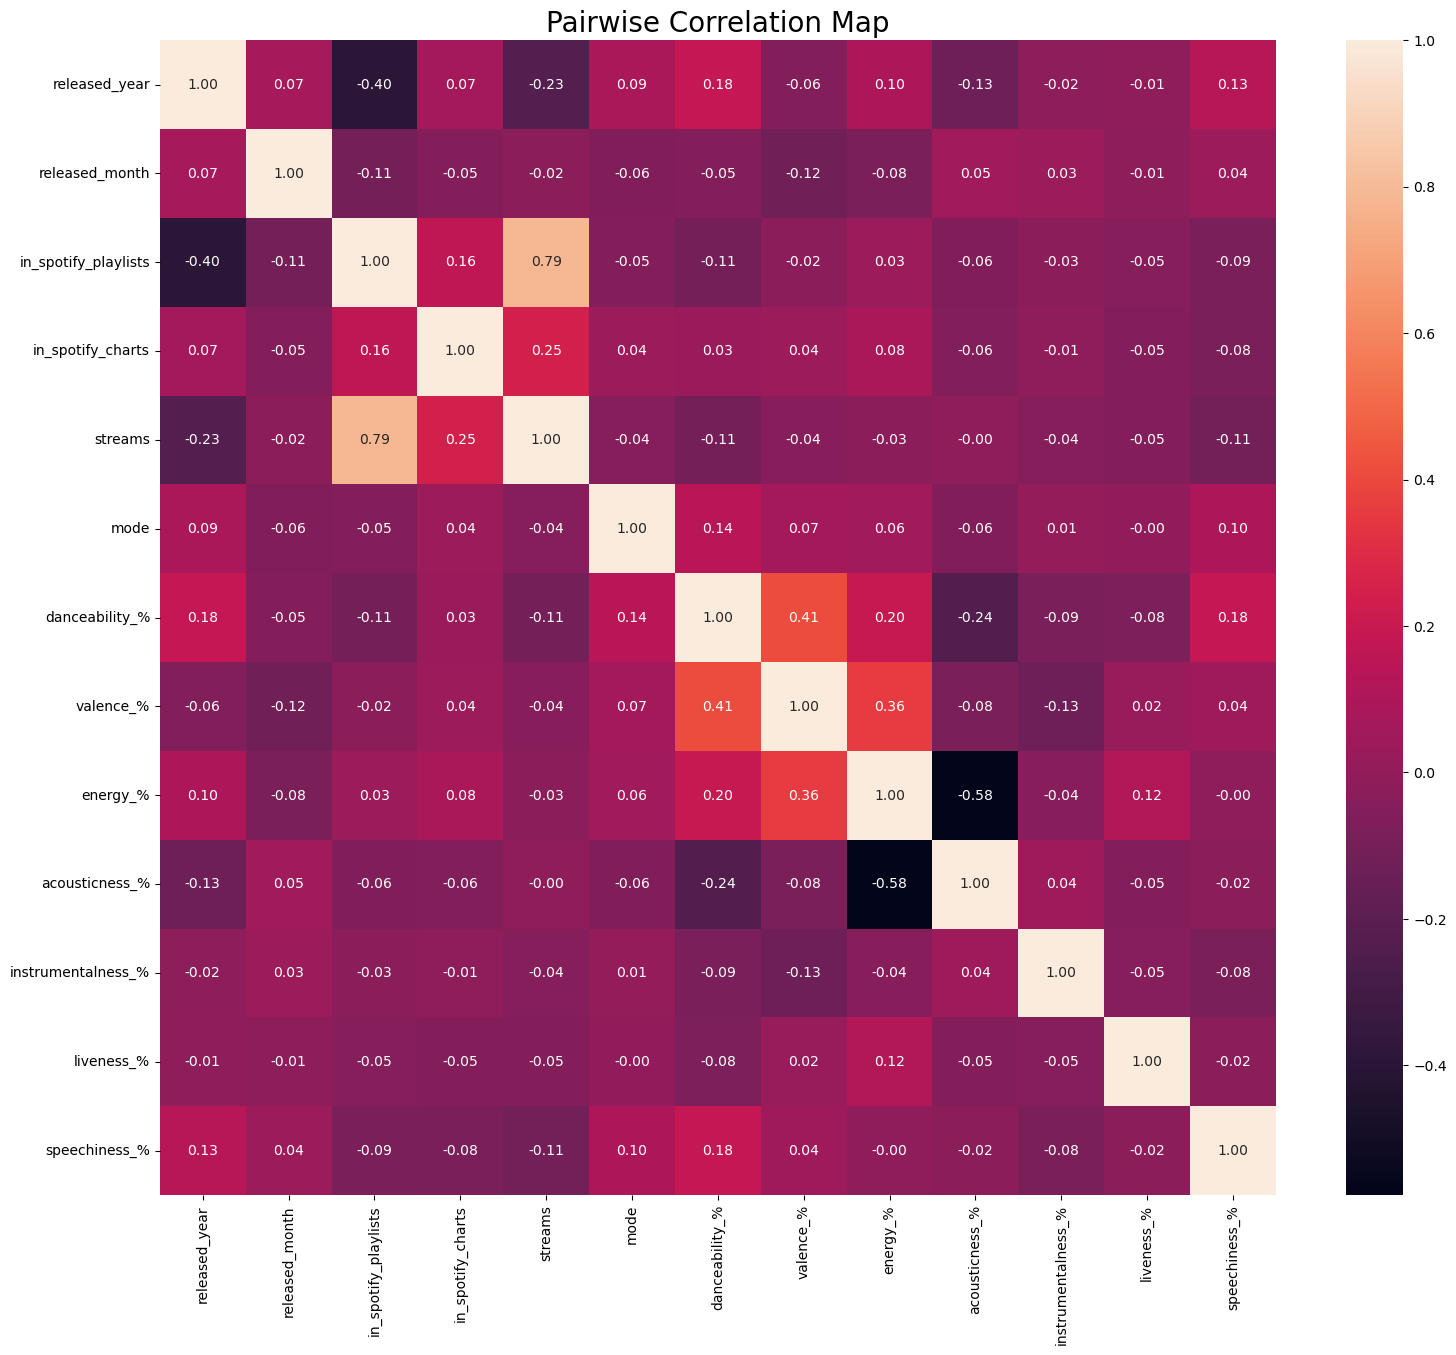

In [23]:
plt.figure(figsize=(18,15))
sb.heatmap(cleaned_data.corr(numeric_only = True),annot=True,fmt='.2f')
plt.title('Pairwise Correlation Map', size = 20)
plt.show()

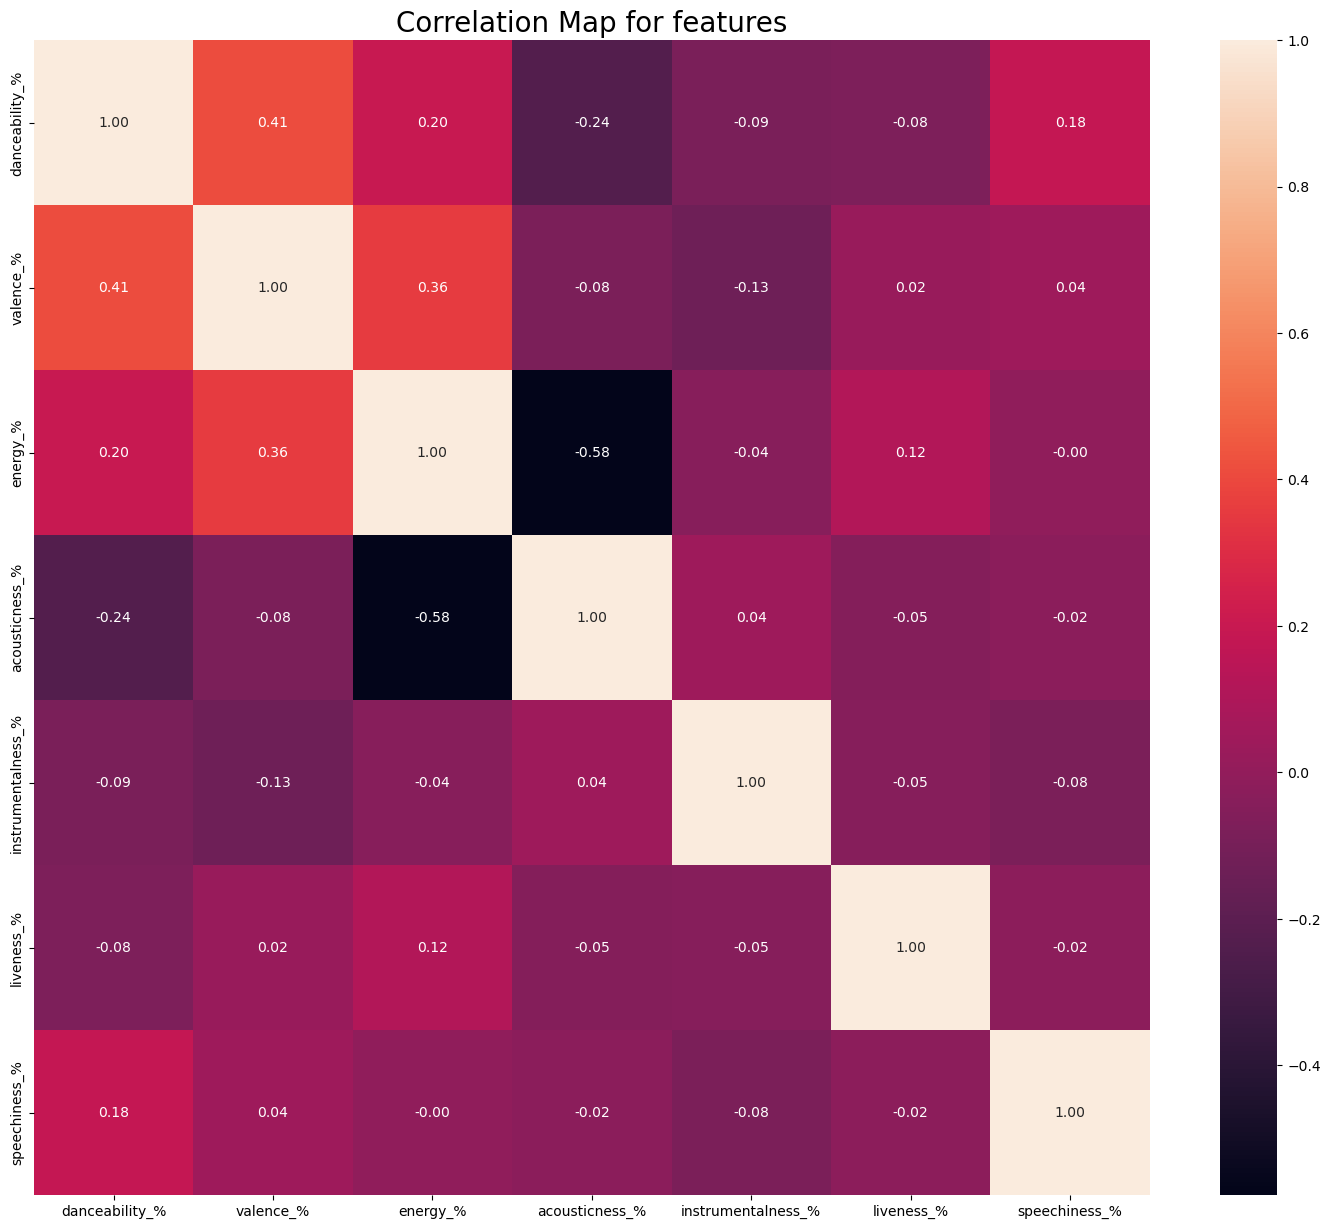

In [24]:
pd.DataFrame(percentage_features).corr()
plt.figure(figsize=(18,15))
sb.heatmap(cleaned_data.iloc[:,-7:].corr(numeric_only = True),annot=True,fmt='.2f')
plt.title('Correlation Map for features', size = 20)
plt.show()